<a href="https://colab.research.google.com/github/AleksPetro/DataLit/blob/master/MidtermAssignment(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Installing required libraries (If first use)
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install quandl

In [0]:
#Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import quandl
import datetime
style.use('ggplot')

#Dates
start_date = datetime.date(2018,3,10)
end_date = datetime.date.today()

quandl.ApiConfig.api_key = "7Hy-4z1MkKi5B5CW-SEx"

#Get Data from Quandl
df = quandl.get('JOHNMATT/PALL',start_date=start_date, end_date=end_date, collapse="daily")
df = df.reset_index()
df = df.dropna() #Remove empty cells 
prices = df['New York 9:30'].tolist()
dates = df.index.tolist()

#Convert to 1d vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))


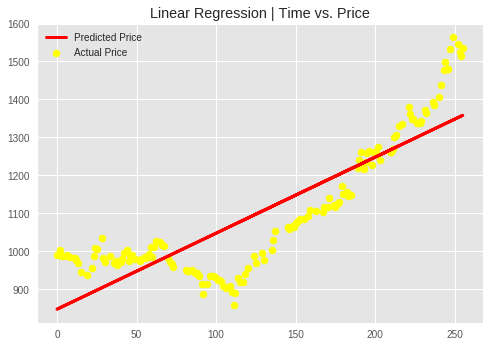

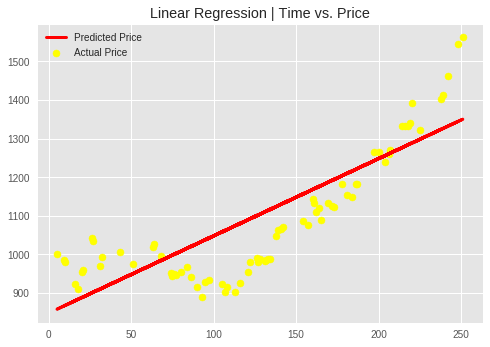

Predicted price for day [100] is: 1047$
Coefficient: 2.001088
Y-intercept: 847.861666


In [74]:
#Define linear regressor object
regressor = LinearRegression()

#Splitting the data set into the training and test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Graph
plt.scatter(xtrain, ytrain, color='yellow',label='Actual Price') #Plotting data points
plt.plot(xtrain, regressor.predict(xtrain), color='red', linewidth=3, label = 'Predicted Price') #Plotting regression line 
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.show()

#Test Graph
plt.scatter(xtest, ytest, color='yellow',label='Actual Price') #Plotting data points 
plt.plot(xtest, regressor.predict(xtest), color='red', linewidth=3, label = 'Predicted Price') #Plotting regression line
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.show()

#Predict Price on Given Date (with training data)
date = [[100]] #Day 100
predicted_price =regressor.predict(date)
print("Predicted price for day %s is: %d$" %(date [0], predicted_price[0][0]))
print("Coefficient: %f" %(regressor.coef_[0][0]))
print("Y-intercept: %f" %(regressor.intercept_[0]))

